# **Notebook: Image Processing and Data Augmentation**

## **1. Introduction**
This notebook provides solutions to all tasks for data augmentation on the CIFAR-10 dataset. It uses TensorFlow, OpenCV, and Numpy for implementations.

## **2. Load the Dataset**
We will use the CIFAR-10 dataset and visualize some of its images.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


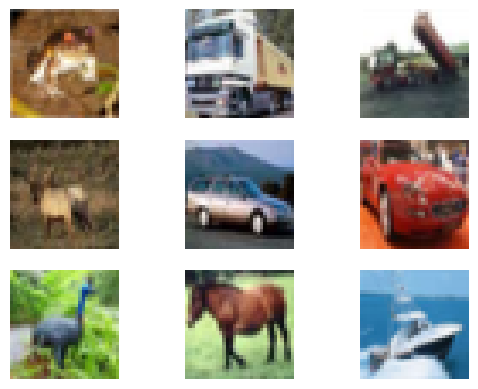

In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Visualize a few samples
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()


In [2]:
x_train[0].shape

(32, 32, 3)

## **3. Data Augmentation Techniques**

### **3.1 Coordinate Transformations**
Apply translation, rotation, and scaling to the images.

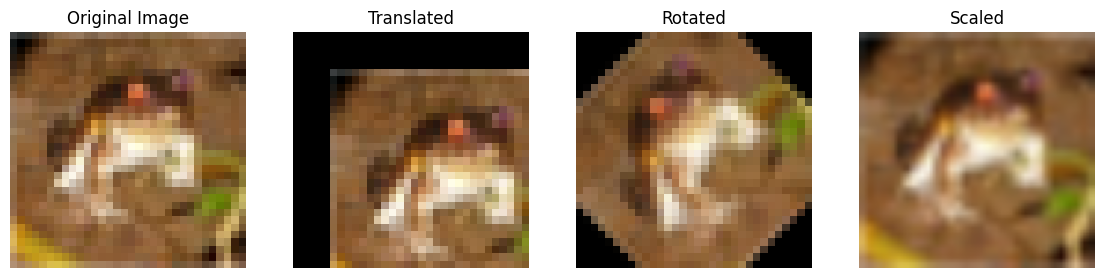

In [11]:

import cv2
import numpy as np

# Translation
def translate_image(image, tx, ty):
    rows, cols, _ = image.shape
    matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, matrix, (cols, rows))

# Rotation
def rotate_image(image, angle):
    #To Do
    Matrix = cv2.getRotationMatrix2D((image.shape[1]//2, image.shape[0]//2), angle, 1)  ## 1 for not rescaling
    return cv2.warpAffine(image, Matrix, (image.shape[1], image.shape[0]))
    # pass

# Scaling = zooming
def scale_image(image, scale_x, scale_y):
    return cv2.resize(image, None, fx=scale_x, fy=scale_y)
'''
def scale_image(image, scale_x, scale_y):
    #To Do
    Matrix = np.float32([[scale_x, 0, 0], [0, scale_y, 0]])
    return cv2.warpAffine(image, Matrix, (image.shape[1], image.shape[0]))
    # pass
'''

# Example
sample_image = x_train[0]
translated = translate_image(sample_image, 5, 5)
rotated = rotate_image(sample_image, 45)
scaled = scale_image(sample_image, 2.5, 2.5)

# Visualize results
plt.figure(figsize=(14, 6))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(sample_image)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Translated")
plt.imshow(translated)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Rotated")
plt.imshow(rotated)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Scaled")
plt.imshow(scaled)
plt.axis('off')

plt.show()


### **3.2 Color Space Transformations**
Convert images to grayscale and HSV color spaces.

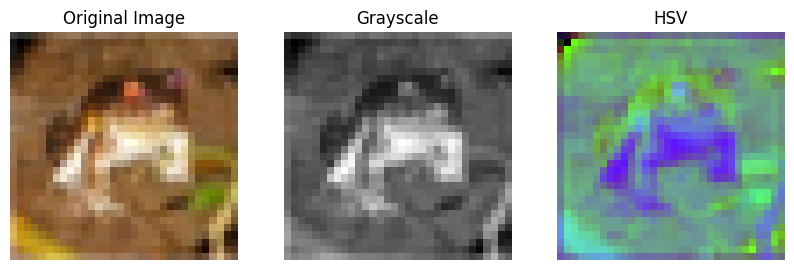

In [5]:
# Grayscale
def convert_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# HSV
def convert_to_hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Example
gray_image = convert_to_gray(sample_image)
hsv_image = convert_to_hsv(sample_image)

# Visualize results
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(sample_image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Grayscale")
plt.imshow(gray_image, cmap='gray') ## cmap='gray' must
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("HSV")
plt.imshow(hsv_image)
plt.axis('off')

plt.show()


### **3.3 Histogram Equalization**
Improve the contrast of grayscale images using histogram equalization.

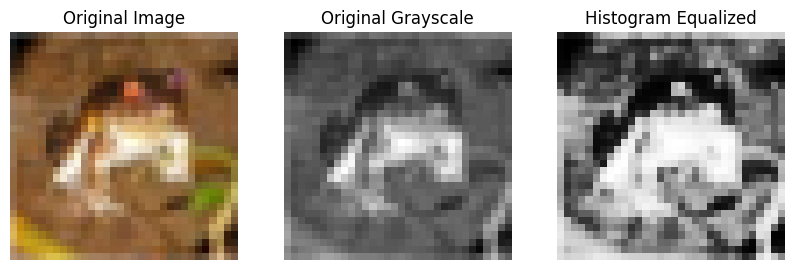

In [7]:
# Histogram Equalization
def histogram_equalization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.equalizeHist(gray)

# Example
equalized_image = histogram_equalization(sample_image)

# Visualize results
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(sample_image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Original Grayscale")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Histogram Equalized")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()


### **3.4 Noise Addition and Filtering**
Add Gaussian noise to images and apply filters to remove it.

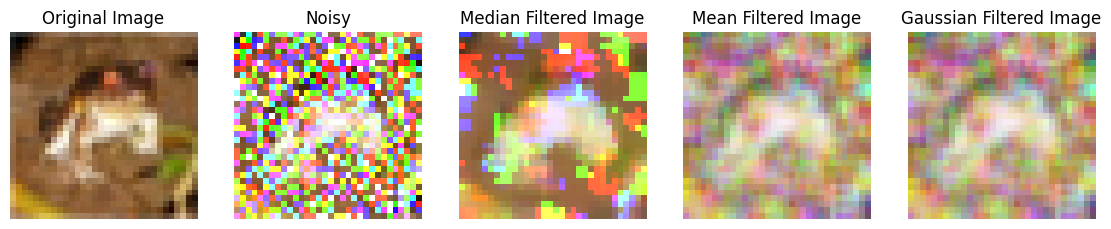

In [9]:
# Add Gaussian Noise
def add_gaussian_noise(image, mean=0, sigma=3):
    gaussnoise = np.random.normal(mean, sigma, image.shape).astype('uint8')
    return cv2.add(image, gaussnoise)
    # return np.clip(noisy_image, 0, 255)

# Median Filter
def median_filter(image):
    return cv2.medianBlur(image, 5)

# Mean Filter
def Mean_filter(image):
    #To Do
    return cv2.blur(image, (3, 3))
    pass
# def gaussian filter
def gaussian_filter(image):
    #To Do
    return cv2.GaussianBlur(image, (3, 3), 3)
    pass

# Example
noisy_image = add_gaussian_noise(sample_image)
filtered_median_image = median_filter(noisy_image)
mean_image = Mean_filter(noisy_image)
gaussian_image = gaussian_filter(noisy_image)

# Visualize results
plt.figure(figsize=(14, 6))

plt.subplot(1, 5, 1)
plt.title("Original Image")
plt.imshow(sample_image)
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title("Noisy")
plt.imshow(noisy_image)
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title("Median Filtered Image")
plt.imshow(filtered_median_image)
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title("Mean Filtered Image")
plt.imshow(mean_image)
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title("Gaussian Filtered Image")
plt.imshow(gaussian_image)
plt.axis('off')

plt.show()


### **3.5 Perspective Transformation**
Apply perspective transformations to warp images.

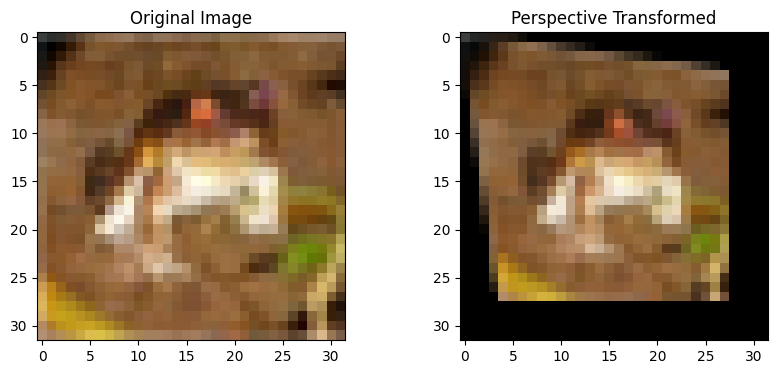

In [10]:

# Perspective Transformation
def perspective_transform(image, pts1, pts2):
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    rows, cols, _ = image.shape
    return cv2.warpPerspective(image, matrix, (cols, rows))

# Example
pts1 = np.float32([[0, 0], [32, 0], [0, 32], [32, 32]])
pts2 = np.float32([[0, 0], [28, 4], [4, 28], [28, 28]])
perspective_image = perspective_transform(sample_image, pts1, pts2)

# Visualize results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title("Perspective Transformed")
plt.imshow(perspective_image)
plt.axis('on')

plt.show()


## **4. Applying to Dataset**


In [12]:
import random

def augment_dataset(images, labels, augment_count=None):
    """
    Augments a dataset by applying random transformations.

    Parameters:
        images (numpy.ndarray): The dataset as an array of images.
        labels (numpy.ndarray): The corresponding labels for the dataset.
        augment_count (int): Number of augmented images to generate per original image.
                             If None, it generates the same number of augmented images as the original dataset.

    Returns:
        tuple: Augmented images and labels as NumPy arrays.
    """
    if augment_count is None:
        augment_count = len(images)

    augmented_images = []
    augmented_labels = []
    original_shape = images[0].shape  # Ensure all images match the original shape

    def random_rotation(image):
        angle = random.uniform(-30, 30)  # Rotate between -30 and 30 degrees
        rows, cols = image.shape[:2]
        matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        return cv2.warpAffine(image, matrix, (cols, rows))

    def random_translation(image):
        rows, cols = image.shape[:2]
        tx = random.uniform(-0.2 * cols, 0.2 * cols)  # Translate up to 20% of image width
        ty = random.uniform(-0.2 * rows, 0.2 * rows)  # Translate up to 20% of image height
        matrix = np.float32([[1, 0, tx], [0, 1, ty]])
        return cv2.warpAffine(image, matrix, (cols, rows))

    def random_scaling(image):
        scale = random.uniform(0.8, 1.2)  # Scale between 80% and 120%
        rows, cols = image.shape[:2]
        scaled = cv2.resize(image, None, fx=scale, fy=scale)
        return cv2.resize(scaled, (cols, rows))  # Resize back to original shape

    def random_flip(image):
        flip_code = random.choice([-1, 0, 1])  # Randomly flip vertically, horizontally, or both
        return cv2.flip(image, flip_code)

    def random_brightness(image):
        value = random.uniform(0.7, 1.3)  # Adjust brightness by 70% to 130%
        image = cv2.convertScaleAbs(image, alpha=value, beta=0)
        return image

    def random_noise(image):
        noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
        noisy_image = cv2.add(image, noise)
        return np.clip(noisy_image, 0, 255)

    # Apply augmentations
    for img, label in zip(images, labels):
        for _ in range(augment_count // len(images)):
            aug_img = img.copy()
            transformations = [
                random_rotation,
                random_translation,
                random_scaling,
                random_flip,
                random_brightness,
                random_noise
            ]
            random.shuffle(transformations)  # Shuffle the transformations
            for transform in transformations[:3]:  # Apply a random subset of transformations
                aug_img = transform(aug_img)
            aug_img = cv2.resize(aug_img, (original_shape[1], original_shape[0]))  # Ensure shape consistency
            augmented_images.append(aug_img)
            augmented_labels.append(label)  # Add the corresponding label

    return np.array(augmented_images), np.array(augmented_labels)

# Example Usage
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Augment the training dataset
augmented_x_train, augmented_y_train = augment_dataset(x_train, y_train, augment_count=2 * len(x_train))

# Check the augmented dataset size
print(f"Original dataset size: {len(x_train)}")
print(f"Augmented dataset size: {len(augmented_x_train)}")
print(f"Original labels size: {len(y_train)}")
print(f"Augmented labels size: {len(augmented_y_train)}")




Original dataset size: 50000
Augmented dataset size: 100000
Original labels size: 50000
Augmented labels size: 100000
